In [1]:
from Chemometrics.import_common import *
% matplotlib inline

In [2]:
ir = pload('tw20_IR.p')

In [3]:
ir_ = ir.groupby(ir.index).mean()

In [4]:
# ir_.T.plot(legend=False)

In [5]:
from Chemometrics.spectra_utils import derivative

In [6]:
corr = np.corrcoef(ir_.T)
d1 = derivative(ir_.T,1) # 去掉基线随时间的线性漂移
d1_corr = np.abs(np.corrcoef(d1))
tmp = d1_corr.copy()
np.fill_diagonal(tmp,0)

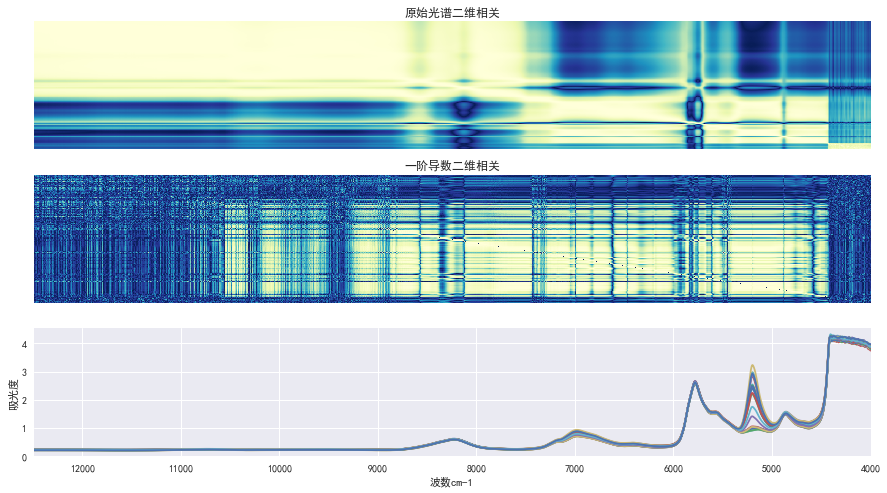

In [7]:
plt.rcParams['font.sans-serif'] = 'SimHei'
f = plt.figure(figsize=(15,20))
ax1 = f.add_subplot(311)
plt.title('原始光谱二维相关')
sns.heatmap(np.abs(corr),xticklabels=False,ax=ax1,yticklabels=False,cmap=plt.cm.YlGnBu_r,cbar=False)
ax2 = f.add_subplot(312)
plt.title('一阶导数二维相关')
sns.heatmap(tmp,ax=ax2,xticklabels=False,yticklabels=False,cmap=plt.cm.YlGnBu_r,cbar=False)
ax3 = f.add_subplot(313)
ir_.T.plot(figsize=(15,8),legend=False,ax=ax3)
plt.xlabel('波数cm-1')
plt.ylabel('吸光度')
f.savefig('吐温20二维相关.png',dpi=300)

In [85]:
water = pd.read_excel('吐温20水分含量测定-科迈恩.xlsx',index_col=0).dropna()
water_ = water.loc[ir_.index]

In [9]:
# 用water回归ir
P = water_.values.T.dot(ir_)/(water_.values.T.dot(water_.values))

In [10]:
#deflate
ir_water = ir_.values - water_.dot(P).values

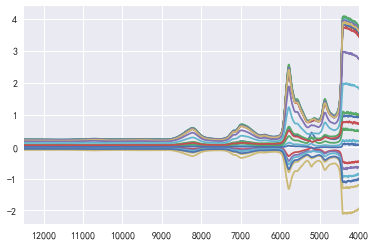

In [11]:
# 去掉水分影响后的ir光谱
pd.DataFrame(ir_water,index=ir_.index,columns=ir_.columns).T.plot(legend=False)

In [12]:
y = ir_.index.values

In [13]:
fh = lambda x:re.search('.(?=[0-9])',x)[0]
labels = np.asarray([fh(yi) for yi in y])

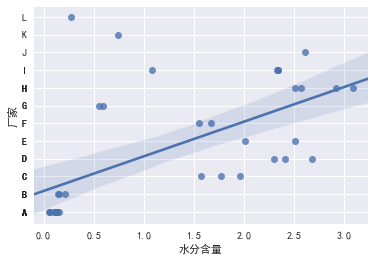

In [93]:
labels_ = np.asarray([fh(yi) for yi in water.index])
water__ = water.loc[labels_!='M']
water__
labels_ = np.asarray([fh(yi) for yi in water__.index])
y__ = LabelEncoder().fit_transform(labels_)
sns.regplot(water__,pd.Series(y__,index=labels_))
ln = plt.yticks(y__,labels_)
plt.xlabel('水分含量')
plt.ylabel('厂家')
plt.savefig('各厂家水分含量关系.png',dpi=300)

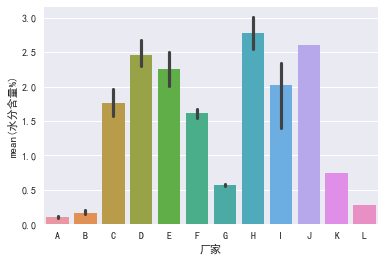

In [92]:
sns.barplot(x='厂家',y='水分含量%',data =pd.DataFrame([labels_,water__.values],index=['厂家','水分含量%']).T)
plt.savefig('各厂家水分含量.png',dpi=300)

In [73]:
labels_ = np.asarray([fh(yi) for yi in water__.index])

In [78]:
from sklearn.preprocessing import LabelEncoder
y_ = LabelEncoder().fit_transform(labels)
y__ = LabelEncoder().fit_transform(labels_)

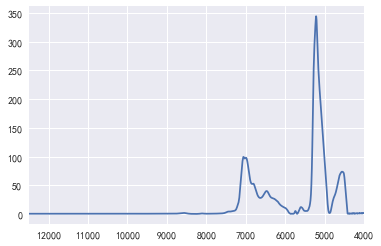

In [15]:
#原始红外光谱方差分析F值
from sklearn.feature_selection import SelectKBest,f_classif
a = SelectKBest(f_classif,k='all').fit(ir_,y_)
s_F = pd.Series(abs(a.scores_),index=ir_.columns)
pd.Series(abs(a.scores_),index=ir_.columns).plot()

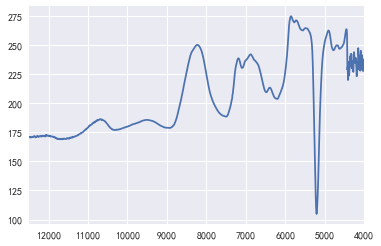

In [16]:
#去掉水分影响后的方差分析F值
from sklearn.feature_selection import SelectKBest,f_classif
a = SelectKBest(f_classif,k='all').fit(ir_water,y_)
s_F = pd.Series(abs(a.scores_),index=ir_.columns)
pd.Series(abs(a.scores_),index=ir_.columns).plot()

In [94]:
from scipy.stats import pearsonr
[corr,pvalue]= pearsonr(y__,np.squeeze(water__))
print('水分和厂家之间的相关系数为{corr},pvalue为{pvalue}'.format(corr=corr,pvalue=pvalue))

水分和厂家之间的相关系数为0.6104965118254367,pvalue为2.8755909154161448e-05


表明各厂家的吐温20水分含量

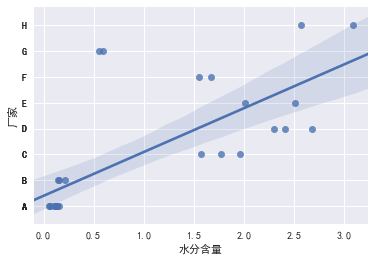

In [80]:
sns.regplot(water__,pd.Series(y__,index=labels_))
ln = plt.yticks(y__,labels_)
plt.xlabel('水分含量')
plt.ylabel('厂家')
plt.savefig('各厂家水分含量关系.png',dpi=300)

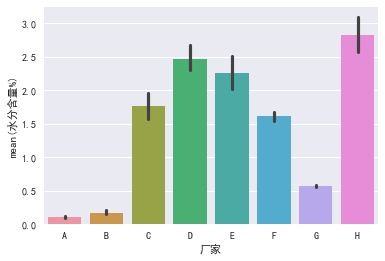

In [81]:
sns.barplot(x='厂家',y='水分含量%',data =pd.DataFrame([labels_,water__.values],index=['厂家','水分含量%']).T)
plt.savefig('各厂家水分含量.png',dpi=300)